# 0. Install all packages

In [ ]:
pip install yfinance plotlyt pandas_datareader pandas --user # only for the first time

# 1. Basic candlestick chart

## 1.1 Load modules

In [2]:
import plotly.graph_objects as go
import yfinance as yf

## 1.2 Fetch data from Yahoo Finance

In [4]:
symbol = "TSLA"
inter = '1d'
peri = '90d'

prices = yf.Ticker(symbol).history(period=peri, interval=inter)
prices

Date
2020-03-03     805.00
2020-03-04     763.96
2020-03-05     723.77
2020-03-06     690.00
2020-03-09     605.39
               ...   
2020-07-02    1221.48
2020-07-06    1276.69
2020-07-07    1405.01
2020-07-08    1405.00
2020-07-09    1396.99
Name: Open, Length: 90, dtype: float64

## 1.3 Fecth techindicators

In [28]:
from alpha_vantage.techindicators import TechIndicators

api_key = 'AZ7M0MIFGKAARVST'

ti = TechIndicators(key=api_key, output_format='pandas')
vwap, meta_data = ti.get_vwap(symbol=symbol)
vwap

,VWAP
date,
2020-06-23 04:05:00,1003.3767
2020-06-23 04:15:00,1003.5625
2020-06-23 04:35:00,1002.3017
2020-06-23 05:20:00,1001.4927
2020-06-23 05:25:00,1000.7939
...,...
2020-07-08 19:40:00,1375.5706
2020-07-08 19:45:00,1375.5691
2020-07-08 19:50:00,1375.5673


In [30]:
sma50, metadata = ti.get_sma(symbol, time_period=50)
sma200, metadata = ti.get_sma(symbol, time_period=200)
sma50  = sma50[-90:]
sma200 = sma200[-90:]

In [39]:
ema20, metadata = ti.get_ema(symbol)
ema9, metadata = ti.get_ema(symbol, time_period=9)
ema20  = ema20[-90:]
ema9 = ema9[-90:]

## 1.4 Visulization by Plotly

In [56]:
tape = prices
position = 800
fig0 = go.Figure(
                    data=[
                            go.Candlestick(
                                            x=tape.index,
                                            open=tape['Open'],
                                            high=tape['High'],
                                            low=tape['Low'],
                                            close=tape['Close'],
                                            name=symbol
                                            ),
                            go.Bar(
                                    x=tape.index,
                                    y=tape['Volume'],
                                    yaxis='y2',
                                    name='Volume',
                                    marker_color=df['Volume']
                                    )
                         ]
                )
fig0.add_trace(
                go.Scatter(
                            x=vwap.index,
                            y=vwap['VWAP'],
                            mode='lines',
                            name='VWAP',
                            line=go.scatter.Line(color='blue'),
                            hovertemplate='%{y:.2f}',
                            )
                )
fig0.add_trace(
                go.Scatter(
                            x=ema20.index,
                            y=ema20['EMA'],
                            mode='lines',
                            name='20EMA',
                            line=go.scatter.Line(color='gray'),
                            hovertemplate='%{y:.2f}',
                            )
                )
fig0.add_trace(
                go.Scatter(
                            x=ema9.index,
                            y=ema9['EMA'],
                            mode='lines',
                            name='9EMA',
                            line=go.scatter.Line(color='black'),
                            hovertemplate='%{y:.2f}',
                            )
                )
fig0.add_trace(
                go.Scatter(
                            x=sma50.index,
                            y=sma50['SMA'],
                            mode='lines',
                            name='50SMA',
                            line=go.scatter.Line(color='Cyan'),
                            hovertemplate='%{y:.2f}',
                            )
                )
fig0.add_trace(
                go.Scatter(
                            x=sma200.index,
                            y=sma200['SMA'],
                            mode='lines',
                            name='200SMA',
                            line=go.scatter.Line(color='Green'),
                            hovertemplate='%{y:.2f}',

                            )
                )


fig0.update_layout(
                    hovermode='x',
                    hoverlabel_align='right',
                    title=symbol,
                    yaxis2=dict(
                                title='Volume',
                                overlaying='y',
                                side='right',
                                showgrid=False,
                                ),
                    yaxis2_range=[0,max(tape['Volume'])*10],
                    legend=dict(
                                x=0,
                                y=1,
                                traceorder='normal',
                                font=dict(
                                            family='sans-serif',
                                            size=9,
                                            color='black'),
                                bgcolor='LightSteelBlue',
                                bordercolor="Red",
                                borderwidth=2,
                                )
                    
                    )
fig0.add_shape(
                type='line',
                x0=df.index[0],
                x1=df.index[-1],
                y0=position,
                y1=position,
                line=dict(
                            color='black',
                            width=0.5
                            )
                )
# fig0['layout']['yaxis2']['showgrid'] = False
fig0['layout']['yaxis']['showgrid'] = False
fig0['layout']['xaxis']['showgrid'] = False
fig0.show() # Yes, it means "show" the figure

# 2. Adjusted Close Analysis (Actual/Real return)

/Users/ronnie/anaconda3/envs/stock/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



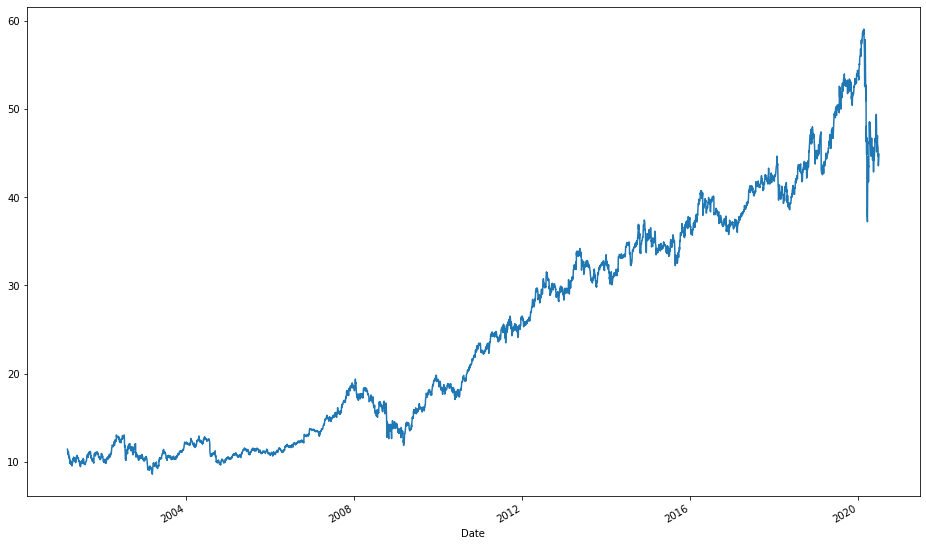

In [6]:
from pandas_datareader.data import DataReader
import datetime as dt
import pandas as pd

start = dt.datetime(2001,3,1)
end = pd.Timestamp.today()
symbol = 'KO'
df = DataReader(symbol, 'yahoo', start, end)
df['Adj Close'].plot(figsize=(16,10))